# Simple Linear Regression Model via PyTorch
The goal of the model is to predict salaries based on years of work experience. A neural network model is created using PyTorch as a simple linear regression model. The Stochastic Gradient Descent (SGD) is adopted as an optimizer, and the cost function is defined using Mean Squared Error (MSE).

## 1. Import data 

In [1]:
import pandas as pd

data = pd.read_csv('Salary_Data.csv')


x = data["YearsExperience"]
y = data["Salary"]
data

,YearsExperience,Salary
0,0.3,36.2
1,0.6,36.6
2,0.8,42.8
3,1.1,39.3
4,1.3,46.2
5,1.5,37.7
6,2.0,43.5
7,2.2,39.8
8,2.9,56.6
9,3.0,60.1


## 2. Convert the data format to Torch

In [2]:
from sklearn.model_selection import train_test_split
import torch

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=87) #test data makes up 20%


# Load data in the form of numpy
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Load data in the form of torch
x_train = torch.from_numpy(x_train)
x_test = torch.from_numpy(x_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

print(f" Training data of x: \n {x_train}\n")
print(f" Test data of y: \n {x_test}\n")
print(f" Training data of y: \n {y_train}\n")
print(f" Test data of y: \n {y_test}")

 Training data of x: 
 tensor([ 6.8000,  4.1000,  7.1000,  0.8000,  3.2000,  9.5000,  1.5000,  2.2000,
         4.5000,  4.9000,  5.3000,  1.1000,  8.2000,  2.9000,  3.2000,  4.0000,
         7.9000,  3.0000,  0.3000,  5.1000,  9.0000,  2.0000, 10.3000,  4.0000,
         8.7000,  3.9000], dtype=torch.float64)

 Test data of y: 
 tensor([ 6.0000, 10.5000,  0.6000,  5.9000,  9.6000,  3.7000,  1.3000],
       dtype=torch.float64)

 Training data of y: 
 tensor([ 91.7000,  57.0000,  98.2000,  42.8000,  64.4000, 116.9000,  37.7000,
         39.8000,  61.1000,  67.9000,  83.0000,  39.3000, 113.8000,  56.6000,
         54.4000,  55.7000, 101.3000,  60.1000,  36.2000,  66.0000, 105.5000,
         43.5000, 122.3000,  56.9000, 109.4000,  63.2000], dtype=torch.float64)

 Test data of y: 
 tensor([ 93.9000, 121.8000,  36.6000,  81.3000, 112.6000,  57.1000,  46.2000],
       dtype=torch.float64)


## 3. Create linear layers with PyTorch (weight and bias)

### 3.1 Design a linear regression model with a PyTorch neural network module 
1. Create layers with a PyTorch module (nn.Linear)
2. in_features: input sample size, out_features: output sample size

In [3]:
from torch import nn                 #import neural network

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1, dtype=torch.float64) #Set features (layer)
        
    def forward(self, x):            # Input x values here and use them to predict y values (y_pred)
        return self.linear_layer(x) 

### 3.2 Review w and b parameters in the linear Regression model

In [4]:
torch.manual_seed(87)                #Fix w and b values for the following observation and analysis

model = LinearRegressionModel()  #Review the LinearRegressionModel function above

#list(model.parameters())          #Present model parameters in a list
model.state_dict()                 #Present model parameters in a dict

OrderedDict([('linear_layer.weight', tensor([[-0.9419]], dtype=torch.float64)),
             ('linear_layer.bias', tensor([0.2761], dtype=torch.float64))])

### 3.3 Input x_test values into the model above and observe its results (y_pred = w*x_test + b)

In [5]:
x_test_reshaped = x_test.reshape(-1,1) 
model(x_test_reshaped) # model(x_test) = y_pred = w * x_test + b

tensor([[-5.3755],
        [-9.6141],
        [-0.2891],
        [-5.2813],
        [-8.7664],
        [-3.2090],
        [-0.9484]], dtype=torch.float64, grad_fn=<AddmmBackward0>)

### 3.4 Review predicted and real data (y_pred and y_test)

In [6]:
y_pred_reshaped = model(x_test_reshaped)

y_test_reshaped = y_test.reshape(-1,1)

print(y_pred_reshaped) 
print(y_test_reshaped)

tensor([[-5.3755],
        [-9.6141],
        [-0.2891],
        [-5.2813],
        [-8.7664],
        [-3.2090],
        [-0.9484]], dtype=torch.float64, grad_fn=<AddmmBackward0>)
tensor([[ 93.9000],
        [121.8000],
        [ 36.6000],
        [ 81.3000],
        [112.6000],
        [ 57.1000],
        [ 46.2000]], dtype=torch.float64)


## 4. Create a cost function
1. Create a cost function with MSE (Mean Squared Error) in nn.MSELoss() .
2. View the initial cost value prior to the introduction of an optimizer

In [7]:
cost_function = nn.MSELoss() 
x_test = x_test.reshape(-1,1)

y_pred_reshaped = model(x_test)
print(f"The average cost between prediced and real y values is:\n {cost_function(y_pred_reshaped, y_test_reshaped)}")

The average cost between prediced and real y values is:
 8081.763783579004


## 5. Convert the matrix of data

In [8]:
print("The original shape of data is as follows.")
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print("------------------------------------------------------------------------------")
print("The new shape of data is as follows.")
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

The original shape of data is as follows.
torch.Size([26]) torch.Size([26]) torch.Size([7, 1]) torch.Size([7])
------------------------------------------------------------------------------
The new shape of data is as follows.
torch.Size([26, 1]) torch.Size([26, 1]) torch.Size([7, 1]) torch.Size([7, 1])


## 6. Create an optimizer
1. Reference to PyTorch optimizers: https://pytorch.org/docs/stable/optim.html 
2. Using SGD (Stochastic Gradient Descent) as an optimizer

In [9]:
# Import an optimizer and calculate costs

from torch import optim 
optimizer = optim.SGD(params = model.parameters(), lr=0.001, momentum=0) #lr: learning rate

## 7. Review changes in w and b values before/after an optimizer is used
Description: as we can see in the following printed values, there is a downward trend in costs.

In [10]:
y_pred = model(x_train)
cost = cost_function(y_pred, y_train) #Review the cost between y_pred and y_train data
print(model.state_dict())
print(cost)
print("------------------------------------------------------------------------------")

#Use an optimizer
optimizer.zero_grad()    #Set the gradient to zero
cost.backward()          #Calculate the gradient 
optimizer.step()         #Update gradient values 

y_pred = model(x_train)
cost = cost_function(y_pred, y_train) #Review the cost between y_pred and y_train data
print(model.state_dict())
print(cost)

OrderedDict([('linear_layer.weight', tensor([[-0.9419]], dtype=torch.float64)), ('linear_layer.bias', tensor([0.2761], dtype=torch.float64))])
tensor(6515.9517, dtype=torch.float64, grad_fn=<MseLossBackward0>)
------------------------------------------------------------------------------
OrderedDict([('linear_layer.weight', tensor([[-0.0652]], dtype=torch.float64)), ('linear_layer.bias', tensor([0.4264], dtype=torch.float64))])
tensor(5749.4774, dtype=torch.float64, grad_fn=<MseLossBackward0>)


### 7.1 Create a for loop to update values of cost, w, and b
1. Train the linear regression model with the datasets of x_train and x_test
2. Use .detach().numpy() to convert tensor forms into numpy for data visualization

In [11]:
epochs = range(30000)

test_cost_hist = []  #Calculate the cost of test datasets
train_cost_hist = [] #Calculate the cost of train datasets

for Epoch in epochs:
    
    #Set a training mode
    model.train()        
    y_pred = model(x_train) 
    train_cost = cost_function(y_pred, y_train)
    train_cost_hist.append(train_cost.detach().numpy())  
    
    
    optimizer.zero_grad()    #Set the gradient to zero
    train_cost.backward()    #Calculate the gradient 
    optimizer.step()         #Update gradient values 
    
    #Set an evaluation mode
    model.eval()             
    with torch.inference_mode():
        test_pred = model(x_test)
        test_cost = cost_function(test_pred, y_test)
        test_cost_hist.append(test_cost.detach().numpy())
    
    if Epoch%1000==0:
        print(f"Epoch: {Epoch:3} | Train cost: {train_cost:20} | Test cost: {test_cost}")

Epoch:   0 | Train cost:    5749.477439184468 | Test cost: 6236.85980402337
Epoch: 1000 | Train cost:      87.448287304345 | Test cost: 155.663532603608
Epoch: 2000 | Train cost:    52.47290765539443 | Test cost: 90.58846625112561
Epoch: 3000 | Train cost:     39.7979721685612 | Test cost: 62.07787087634113
Epoch: 4000 | Train cost:    35.20462704385137 | Test cost: 48.77933120367116
Epoch: 5000 | Train cost:    33.54001743249564 | Test cost: 42.174232044343675
Epoch: 6000 | Train cost:    32.93676967231501 | Test cost: 38.70555393136441
Epoch: 7000 | Train cost:     32.7181551349001 | Test cost: 36.80136603312115
Epoch: 8000 | Train cost:    32.63893011472791 | Test cost: 35.721714277259345
Epoch: 9000 | Train cost:    32.61021928929288 | Test cost: 35.095927233942795
Epoch: 10000 | Train cost:   32.599814602801544 | Test cost: 34.72796169113581
Epoch: 11000 | Train cost:    32.59604398668924 | Test cost: 34.50962133667884
Epoch: 12000 | Train cost:   32.594677530729385 | Test cost: 3

## 8. Visualize how the cost changes in each epoch

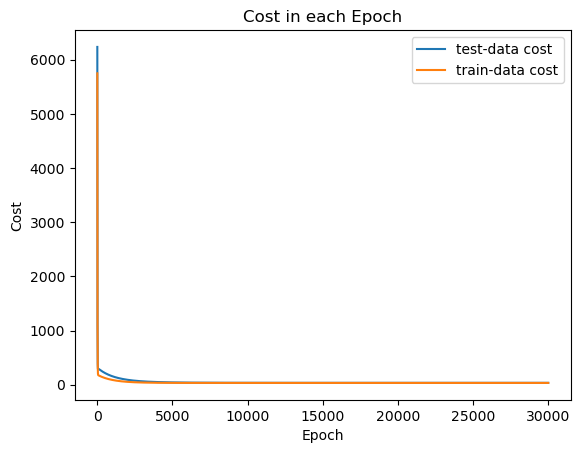

The optimal values of w and b are: 9.33 and 26.63.


In [12]:
import matplotlib.pyplot as plt

plt.plot(epochs, test_cost_hist, label ="test-data cost")
plt.plot(epochs, train_cost_hist, label ="train-data cost")
plt.title("Cost in each Epoch")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.legend()
plt.show()

print(f"The optimal values of w and b are: {round(float(model.linear_layer.weight.detach().numpy()),2)} and {round(float(model.linear_layer.bias.detach().numpy()),2)}.")


# 9. Calculate the accuracy of the simple linear regression model above
1. Convert the array format to float
2. Calcuate the Coefficient of Determination (R^2) between predicted and real y values.

In [13]:
#Convert the array format to float
float_w = float(model.linear_layer.weight.detach().numpy())
float_b = float(model.linear_layer.bias.detach().numpy())

In [14]:
list_of_y_predicted = []
for i in x:
    y_predicted = float_w * i + float_b
    y_predicted = round(y_predicted, 1)
    # print(y_predicted)
    list_of_y_predicted.append(y_predicted)
print("The following list shows predicted y values with optimal w and b values:")
print(list_of_y_predicted)

The following list shows predicted y values with optimal w and b values:
[29.4, 32.2, 34.1, 36.9, 38.8, 40.6, 45.3, 47.2, 53.7, 54.6, 56.5, 56.5, 61.2, 63.0, 64.0, 64.0, 64.9, 68.6, 72.3, 74.2, 76.1, 81.7, 82.6, 90.1, 92.9, 100.3, 103.1, 107.8, 110.6, 115.3, 116.2, 122.7, 124.6]


In [15]:
import numpy as np

y_real = y                              #Load original real y data
y_pred = np.array(list_of_y_predicted)

# Coefficient of Determination (R^2)
ss_total = np.sum((y_real - np.mean(y_real)) ** 2)
ss_residual = np.sum((y_real - y_pred) ** 2)
r2_score = (1 - (ss_residual / ss_total)) 
r2_score = round(r2_score, 3)
print(f"The R^2 score of the simple linear regression model above is about: {r2_score}.")

The R^2 score of the simple linear regression model above is about: 0.958.


# Conclusion
In this trial, after 30,000 epochs, the optimal weight and optimal bias value are about 9.33 and 26.63, respectively. With 32 salary datasets, the  Coefficient of Determination (R^2) score of this model is estimated to be about 95.8%.